# Polynomial model

Polynomial model 是泛化版(generalization)的 Linear model

$f(x)=w_n x^n +...+w_1 x+w_0$

when n = 1,  $f(x) = w_1 x + w_0$

[3 1 1 4 3 3]


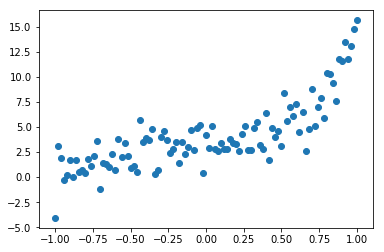

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 40

trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = np.random.randint(1,7, size=num_coeffs) #[1, 2, 3, 4, 5, 6]
print(trY_coeffs)
trY = 0

for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()


In [38]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)     # wx + w^2 x^2 +...

In [39]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = (tf.pow(Y - y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [40]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)
sess.close()

[3.1219697 1.2181277 1.5349146 3.259485  2.418158  3.3912916]


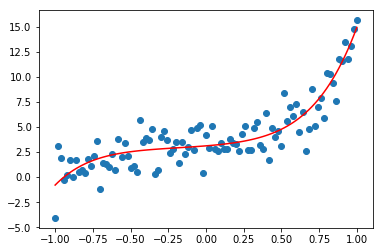

In [41]:
plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)

plt.plot(trX, trY2, 'r')
plt.show()